<a href="https://colab.research.google.com/github/rashanjotkaur/DeepFaceFromColab/blob/main/main_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
pip install retina-face

In [15]:
pip install tf-keras

In [16]:
pip install cmake

In [17]:
!cmake --version

cmake version 3.30.5

CMake suite maintained and supported by Kitware (kitware.com/cmake).


In [18]:
pip install face_recognition

In [19]:
pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.0 MB/s eta 0:00:00


In [20]:
# Required Libraries
import cv2
import numpy as np
import tensorflow as tf
from retinaface import RetinaFace
from mtcnn import MTCNN
from scipy.spatial.distance import cosine
from sklearn.preprocessing import normalize

In [21]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [22]:
!pip install face_recognition

In [23]:
import face_recognition

In [31]:
from google.colab import files
uploaded = files.upload()  # This will open a file dialog to select files from your system


Saving db_photo.jpg to db_photo.jpg
Saving photo.jpg to photo.jpg


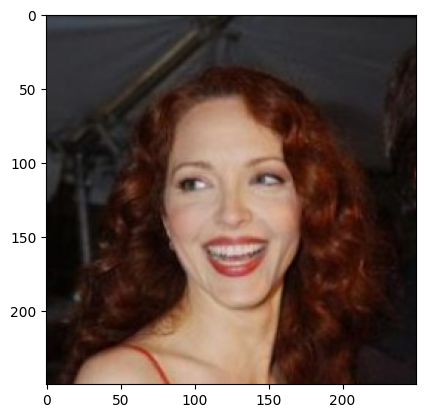

In [33]:
import matplotlib.pyplot as plt

# Specify the filename of the uploaded image
image_path = "photo.jpg"  # Replace with the actual file name

# Read the image
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is not None:
    # Convert to RGB and show it
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()
else:
    print("Image could not be loaded.")


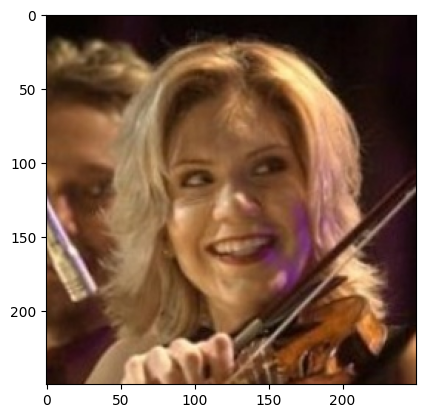

In [34]:
# Specify the filename of the uploaded image
image_path = "db_photo.jpg"  # Replace with the actual file name

# Read the image
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is not None:
    # Convert to RGB and show it
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()
else:
    print("Image could not be loaded.")


In [36]:
# Step 1 - Face Detection: Use RetinaFace or MTCNN
def detect_faces(image_path, method):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    if method == 'retinaface':
        # RetinaFace Face Detection
        faces = RetinaFace.detect_faces(image_rgb)
        bboxes = [faces[key]['facial_area'] for key in faces]
    elif method == 'mtcnn':
        # MTCNN Face Detection
        detector = MTCNN()
        faces = detector.detect_faces(image_rgb)
        bboxes = [face['box'] for face in faces]

    return image, bboxes

In [37]:
# Step 2 - Feature Embedding: Use FaceNet or ArcFace
def get_face_embedding(image, bboxes, method='facenet'):
    # For FaceNet
    if method == 'facenet':
        # FaceNet embedding
        face_rec = face_recognition
        embeddings = []
        for bbox in bboxes:
            x1, y1, width, height = bbox
            face = image[y1:y1+height, x1:x1+width]
            rgb_face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            encoding = face_rec.face_encodings(rgb_face)
            if encoding:
                embeddings.append(encoding[0])

    # For ArcFace, use a pre-trained model like ArcFace from InsightFace
    elif method == 'arcface':
        # ArcFace embedding - Need InsightFace or ArcFace model loaded
        pass  # ArcFace model loading and face embedding code goes here

    return embeddings

In [38]:
# Step 3 - L2 Normalization
def l2_normalize(embeddings):
    embeddings = np.array(embeddings)
    embeddings_normalized = normalize(embeddings, norm='l2')
    return embeddings_normalized

In [39]:
# Step 4 - Face Matching
def compare_faces(embedding1, embedding2, metric='cosine'):
    if metric == 'cosine':
        return cosine(embedding1, embedding2)
    elif metric == 'euclidean':
        return np.linalg.norm(embedding1 - embedding2)

In [40]:
# Example of usage

# Load and detect faces from a query image
image_path = "photo.jpg"  # Input Image Path

# Step 1: Face Detection: Use RetinaFace or MTCNN
detection_method = "mtcnn"
image, bboxes = detect_faces(image_path, detection_method)

# Step 2: Feature Embedding: Use FaceNet or ArcFace
embedding_method = "facenet"
query_embeddings = get_face_embedding(image, bboxes,embedding_method)

# Step 3: L2 Normalization
query_embeddings_normalized = l2_normalize(query_embeddings)

In [45]:
# For database image, repeat the process (get embedding + normalize)
db_image_path = "db_photo.jpg"
# Step 1: Face Detection
db_detection_method = "mtcnn"
db_image, db_bboxes = detect_faces(db_image_path, db_detection_method)
# Step 2: Face Embeddings
db_embedding_method = "facenet"
db_embeddings = get_face_embedding(db_image, db_bboxes, db_embedding_method)
db_embeddings_normalized = l2_normalize(db_embeddings)

# Compare query image embedding with database image embedding
distances = []
for db_embedding in db_embeddings_normalized:
    for query_embedding in query_embeddings_normalized:
        dist = compare_faces(query_embedding, db_embedding)
        distances.append(dist)

# Output the comparison result
print(f"Distance(s) between query image and database: {distances}")

Distance(s) between query image and database: [0.1496623431958568]


In [42]:
from scipy.spatial.distance import cosine

similarity = 1 - cosine(query_embedding, db_embedding)
print(f"Similarity(s) between query image and database: {similarity}")

Similarity(s) between query image and database: 0.8503376568041432
